In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [2]:
listings = pd.read_csv("listings.csv", index_col= "id")
listings_details = pd.read_csv("listings_details.csv", index_col= "id", low_memory=False)
calendar = pd.read_csv("calendar.csv", parse_dates=['date'], index_col=['listing_id'])
reviews_details = pd.read_csv("reviews_details.csv", parse_dates=['date']) 

In [4]:
listings

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199
28658,Cosy guest room near city centre -1,123414,Michele,NaN,Bos en Lommer,52.375342,4.857289,Private room,65,3,434,2018-11-19,4.16,2,295
28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.367187,4.890918,Private room,75,2,215,2018-12-03,2.13,3,137
29051,Comfortable single room,124245,Edwin,NaN,Centrum-West,52.367725,4.891512,Private room,55,2,383,2018-12-05,4.07,3,188
31080,2-story apartment + rooftop terrace,133488,Nienke,NaN,Zuid,52.351321,4.848383,Entire home/apt,219,3,32,2017-10-16,0.36,1,336


In [5]:
listings_details

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,NaN,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm Checkout anyt...,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03
28658,https://www.airbnb.com/rooms/28658,20181206172549,2018-12-06,Cosy guest room near city centre -1,2 beds guest room in Amsterdam West near Erasm...,Cosy small but comfortable guest room with twi...,2 beds guest room in Amsterdam West near Erasm...,none,"The listing is located in Amsterdam west, betw...",- When making a reservation please send a mess...,...,f,NaN,{Amsterdam},f,f,moderate,t,t,2,4.16
28871,https://www.airbnb.com/rooms/28871,20181206172549,2018-12-06,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,NaN,...,f,NaN,{Amsterdam},f,f,moderate,f,f,3,2.13
29051,https://www.airbnb.com/rooms/29051,20181206172549,2018-12-06,Comfortable single room,because of the city imposing a 4 paying guest ...,In a monumental house right in the center of A...,because of the city imposing a 4 paying guest ...,none,the street is quite lively especially on weeke...,NaN,...,f,NaN,{Amsterdam},f,f,moderate,f,f,3,4.07
31080,https://www.airbnb.com/rooms/31080,20181206172549,2018-12-06,2-story apartment + rooftop terrace,NaN,My apartment is light and cosy. The three bed...,My apartment is light and cosy. The three bed...,none,NaN,Amsterdam and its surroundings are best explor...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,0.36


In [6]:
calendar

,date,available,price
listing_id,,,
2818,2019-12-05,f,NaN
73208,2019-08-30,f,NaN
73208,2019-08-29,f,NaN
73208,2019-08-28,f,NaN
73208,2019-08-27,f,NaN
73208,2019-08-26,f,NaN
73208,2019-08-25,f,NaN
73208,2019-08-24,f,NaN
73208,2019-08-23,f,NaN


In [7]:
reviews_details

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...
5,2818,4748,2009-06-29,20192,Jie,Daniel was a great host! He made everything so...
6,2818,5202,2009-07-07,23055,Vanessa,Daniele is an amazing host! He provided everyt...
7,2818,9131,2009-09-06,26343,Katja,You can´t have a nicer start in Amsterdam. Dan...
8,2818,12103,2009-10-01,40999,Marie-Eve,Daniel was a fantastic host. His place is calm...
9,2818,16196,2009-11-04,38623,Graham,Daniel was great. He couldn.t do enough for us...


In [8]:
print(listings.shape)

(20030, 15)


The listings file contains 15 variables per listing besides the id.

In [9]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

The listings_details file contains a total of 96 variables. I am not going to use all of these, but selectively joined a number of variables that seemed useful to me for this EDA.

In [10]:
target_columns = ["property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate", "street", "weekly_price", "monthly_price", "market"]
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 2818 to 30580413
Data columns (total 35 columns):
name                              19992 non-null object
host_id                           20030 non-null int64
host_name                         20026 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     20030 non-null object
latitude                          20030 non-null float64
longitude                         20030 non-null float64
room_type                         20030 non-null object
price                             20030 non-null int64
minimum_nights                    20030 non-null int64
number_of_reviews                 20030 non-null int64
last_review                       17624 non-null object
reviews_per_month                 17624 non-null float64
calculated_host_listings_count    20030 non-null int64
availability_365                  20030 non-null int64
property_type                     20030 non-null ob

We see that neighbourhood_group is useless in Amsterdam, as it contains zero non-null objects. Below, I getting rid of this variable, and am showing the head of the dataframe that I am going to work with.

In [11]:
listings['host_response_rate'] 

id
2818        100%
3209        100%
20168       100%
25428       100%
27886       100%
28658       100%
28871       100%
29051       100%
31080         0%
41125       100%
42970       100%
43980       100%
44129        91%
44391       100%
45246       100%
46386        NaN
47061       100%
48076        80%
49790       100%
50515        67%
50518       100%
50523       100%
50570       100%
52490        NaN
53067       100%
53671       100%
53692       100%
55256       100%
55703       100%
55709       100%
            ... 
30548247     NaN
30548352     NaN
30548840     NaN
30549080    100%
30549104     99%
30549124     NaN
30549659     NaN
30550093    100%
30551447     88%
30551479    100%
30552137    100%
30553458     NaN
30553701     NaN
30553840     NaN
30553943     NaN
30554026     NaN
30556050     50%
30556632     NaN
30556768     NaN
30556993     NaN
30561688     NaN
30562273     NaN
30562689     NaN
30563877     NaN
30573892     NaN
30576148     NaN
30577727     NaN
30578037   

In [12]:
listings = listings.drop(columns=['neighbourhood_group'])
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))

In [13]:
listings['host_response_rate']

id
2818        100.0
3209        100.0
20168       100.0
25428       100.0
27886       100.0
28658       100.0
28871       100.0
29051       100.0
31080         0.0
41125       100.0
42970       100.0
43980       100.0
44129        91.0
44391       100.0
45246       100.0
46386         NaN
47061       100.0
48076        80.0
49790       100.0
50515        67.0
50518       100.0
50523       100.0
50570       100.0
52490         NaN
53067       100.0
53671       100.0
53692       100.0
55256       100.0
55703       100.0
55709       100.0
            ...  
30548247      NaN
30548352      NaN
30548840      NaN
30549080    100.0
30549104     99.0
30549124      NaN
30549659      NaN
30550093    100.0
30551447     88.0
30551479    100.0
30552137    100.0
30553458      NaN
30553701      NaN
30553840      NaN
30553943      NaN
30554026      NaN
30556050     50.0
30556632      NaN
30556768      NaN
30556993      NaN
30561688      NaN
30562273      NaN
30562689      NaN
30563877      NaN
3057389

# 2. Data exploration
## 2.1 Neighbourhoods
Neighbourhood "De Baarsjes" holds most listings, and altogether eight neigbourhoods have over one thousand listings.



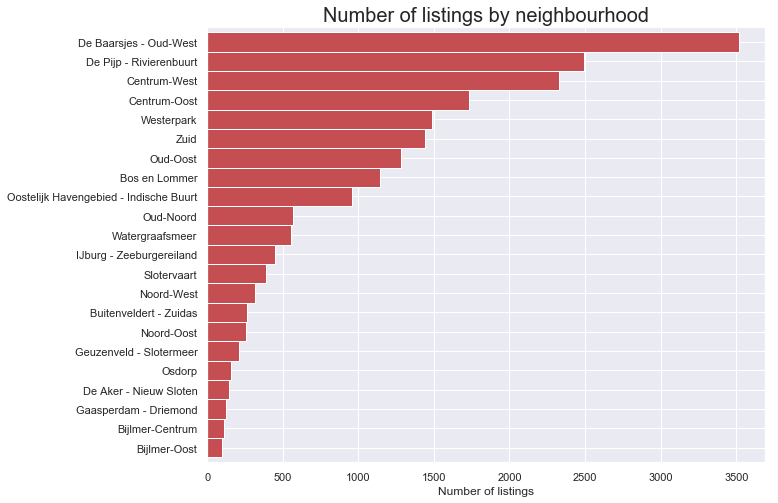

In [14]:
feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='r', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

Below, you can see that most listings are in the city centre. This map is interactive, and you can zoom-in on the clusters to eventually find the individual locations of the listings.

Note: In a later version I made a map on the average daily price per neighoudhood (section 4.1). I think this map would also be better at this point (as it uses the neighbourhood shapefile), but as my main goal of this kernel is to learn as much as possible I left the map below unchanged as FastMarkerCluster seems useful for the future.

In [15]:
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

## 2.2 Room types and property types
### 2.2.1 Room types
The room type is very important in Amsterdam, because Amsterdam has a rule that Entire homes/apartments can only be rented out via Airbnb for a maximum of 60 days a year. Below, we can see that this restriction applies to most of the listings.

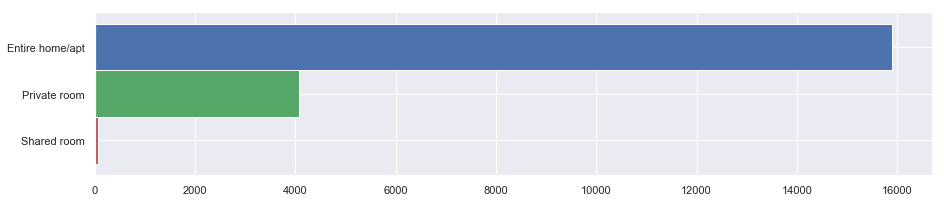

In [16]:
freq = listings['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["r","g","b"])
plt.show()

### 2.2.2 Property types
In the dataset, we find a lot of different property types.

In [17]:
listings.property_type.unique()

array(['Apartment', 'Townhouse', 'Houseboat', 'Bed and breakfast', 'Boat',
       'Guest suite', 'Loft', 'Serviced apartment', 'House',
       'Boutique hotel', 'Guesthouse', 'Other', 'Condominium', 'Chalet',
       'Nature lodge', 'Tiny house', 'Hotel', 'Villa', 'Cabin',
       'Lighthouse', 'Bungalow', 'Hostel', 'Cottage', 'Tent',
       'Earth house', 'Campsite', 'Castle', 'Camper/RV', 'Barn',
       'Casa particular (Cuba)', 'Aparthotel'], dtype=object)

However, many of those property types have very few listings in Amsterdam. In the figure below, I am only displaying property types with at least 100 listings. As we can see, the vast majority of the properties in Amsterdam are apartments.

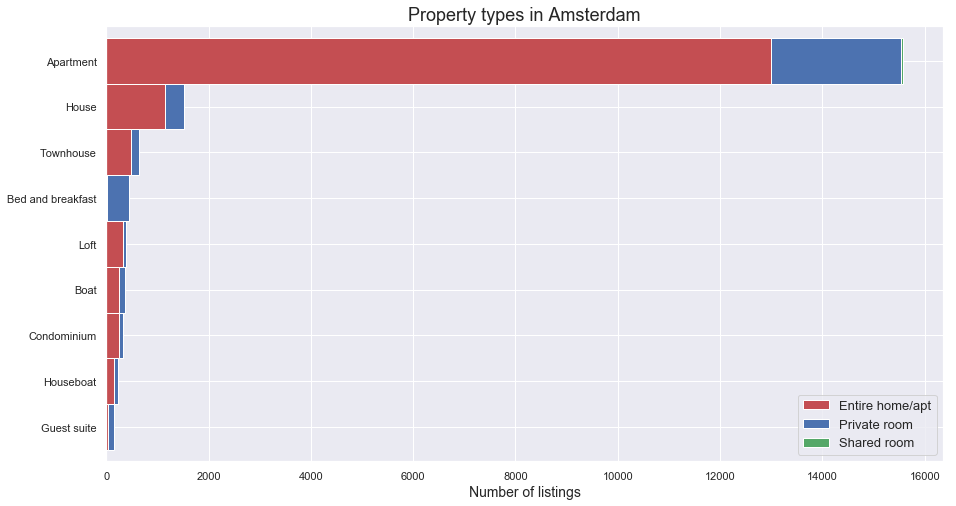

In [18]:
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

## 2.3 Accommodates (number of people)
As expected, most listings are for 2 people. In addition, Airbnb uses a maximum of 16 guests per listing.

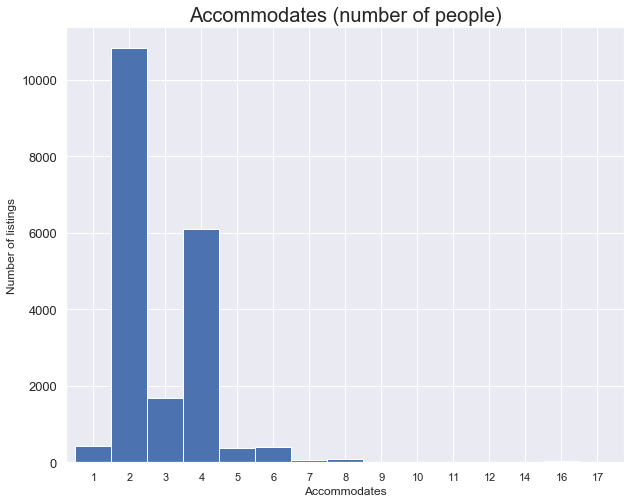

In [19]:
feq=listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

However, Amsterdam has an additional restriction. Due to fire hazard considerations and also taking possible noisy group into account, owners are only allowed to rent their property to groups with a maximum of 4 people. This actually means that the listings that indicate that the maximum number of people is above 4 are breaking this rule!

In [20]:
private = listings[listings['room_type'] == "Private room"]
host_private = private.groupby(['host_id', 'host_name', 'street']).size().reset_index(name='private_rooms').sort_values(by=['private_rooms'], ascending=False)
host_private.head()

,host_id,host_name,street,private_rooms
2436,67005410,Feliciano,"Amsterdam, Noord-Holland, Netherlands",15
918,10076897,Geraldine,"Amsterdam, Noord-Holland, Netherlands",13
2113,44168250,Ruben,"Amsterdam, Noord-Holland, Netherlands",13
1570,22879651,Wamme,"Amsterdam, Noord-Holland, Netherlands",7
3209,174174070,Amrath,"Badhoevedorp, Badhoevedorp, Netherlands",7


However, we have the GPS-coordinates of the listings. To me, it seems very likely that all private rooms that host Feliciano offers are in fact in the same building (only minor variations in latitude/longitude). Although this host might have a hotel license, his listings seem suspicious too me (what is the name of the hotel?)! I would advise the municipality of Amsterdam to check if no rules are broken in this case.

In [21]:
feliciano = private[private['host_id']== 67005410]
feliciano = feliciano[['name','host_id', 'host_name', 'latitude', 'longitude']]
feliciano.index.name = "listing_id"
feliciano

,name,host_id,host_name,latitude,longitude
listing_id,,,,,
12392592,Hotel in the heart of Amsterdam 2p,67005410,Feliciano,52.375251,4.900321
12444222,Hotel in the heart of Amsterdam 4p,67005410,Feliciano,52.375130,4.899694
12446710,Hotel in the heart of Amsterdam 3p,67005410,Feliciano,52.374695,4.900266
12451293,"Hotel in the heart of Amsterdam, Single room",67005410,Feliciano,52.374682,4.898916
12579177,Hotel in the heart of Amsterdam 2p,67005410,Feliciano,52.374567,4.898310
12582071,Hotel in the heart of Amsterdam 3p,67005410,Feliciano,52.373407,4.900022
12865293,Hotel in the heart of Amsterdam 2p,67005410,Feliciano,52.375077,4.900191
12865495,Hotel in the heart of Amsterdam 2p,67005410,Feliciano,52.373396,4.898427
12898673,Hotel in the heart of Amsterdam 1p,67005410,Feliciano,52.373346,4.898344


## 3.2 Unwanted effects of professional hosts?
At the moment, Amsterdam has no rule in place to prevent professional hosting activities. I can imagine that having the option to outsource these activities leads to even more listings. At the moment, about 75% of the hosts only have one listing. I assume that hosts with just a couple of listings are likely to also be the host for a couple of friends. However, we see that there are extreme cases. I believe that it becomes unlikely that hosts with more than 10 listings are just doing this for themselves and friends and family.

In [22]:
freq = listings.groupby(['host_id']).size().reset_index(name='num_host_listings')
host_prop = freq.groupby(['num_host_listings']).size().reset_index(name='count').transpose()
host_prop.columns = host_prop.iloc[0]
host_prop = host_prop.drop(host_prop.index[0])
host_prop

num_host_listings,1,2,3,4,5,6,7,8,9,10,...,19,21,24,25,27,30,38,83,105,208
count,15830,1104,174,50,37,24,9,6,4,3,...,2,2,1,1,1,1,1,1,1,1


Below, I diplay the hosts with more that 20 listings. Unfortunately, the host_about is not fully scraped. However as this dataset is extremely recent, it was not hard for me to find the host description of the host with 200+ listings on airbnb.com. As you can see, this host clearly is a professional host!

As it is probably hard to implement and control a measure that completely forbids professional hosting activities, I would advise the municipality of Amsterdam to consider setting a maximum number of listings per host. If Amsterdam would set this at for instance 10 (and manages to get this implemented in Airbnb's systems), it would becomes much harder to exploit hosting at Airbnb as a professional activity.

In [23]:
freq = listings.groupby(['host_id', 'host_name', 'host_about']).size().reset_index(name='num_host_listings')
freq = freq.sort_values(by=['num_host_listings'], ascending=False)
freq = freq[freq['num_host_listings'] >= 20]
freq

,host_id,host_name,host_about,num_host_listings
8166,65859990,Martijn,"Hi, I'm Martijn, \r\n\r\nWe are a team of prof...",208
535,1464510,Michiel And Jane,"Hi, we are Michiel & Jane,\r\n\r\nWe are a tea...",105
8999,113977564,Willem,I own a hotel in Amsterdam and manage properti...,38
190,517215,Niels En Viv (Welcome Back),"Hi travellers, \r\n\r\nWe are Welcome Back, a ...",30
4935,14183886,Luis,We are Luis and Melanie and we managed our own...,25
4531,11969034,Raul,"Dear Guests,\r\n\r\nI'm Raul, 35 years old. I ...",24
7456,44168250,Ruben,Running a family business in real estate & tou...,21
3457,7594884,"Ruben, Sarah & Lindy","We are Ruben, Sarah & Lindy, we rent out prope...",21


Hosted by Martijn

Amsterdam, Netherlands · Joined in April 2016

Martijn User Profile: 1928 Reviews, Verified

Hi, I'm Martijn, We are a team of professional hosts established by travelers just like you. We believe in sharing homes. Wherever you are, it is delightful to explore and discover an unknown city from an authentic home. On behalf of home owners we advertise their properties through our airbnb profile and support them by offering you a pleasant stay. When you book your holiday with us, you can be confident of a memorable stay and an experience through the eyes of a local. We are more than happy to share our knowledge, give you the best insider tips and recommendations about Amsterdam. If you have any questions, holiday wishes or simply want to have a chat, then feel free to contact us any time. We always reply within an hour! We look forward to being your host! :)

# 4. Advice to the tourists
## 4.1 Average daily price per neighbourhood
In order to compare "apples to apples" I have only selected the most common type of accommodation, which is accommodation for 2 persons. As expected, accommodation in the city centre is the most expensive. 

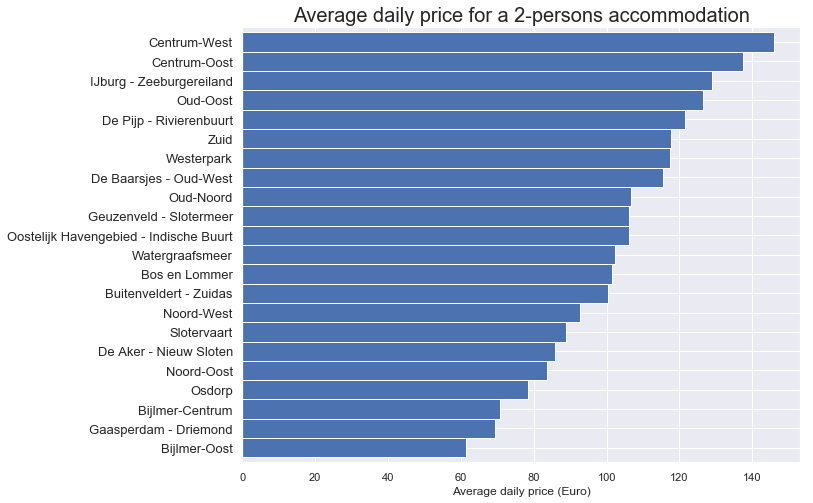

In [24]:
feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

Below you can find the neighbourhoods on a map. This map is **interactive**. Hovering over the polygons shows the name of the neighbourhood, and the average price for 2-persons accommodations.

In [25]:
adam = gpd.read_file("neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[52.3680, 4.9036], zoom_start=11)
folium.GeoJson(data=adam,
               name='Amsterdam',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

## 4.3 Review scores location, and location scores versus price
In tis section, I am grouping the review scores for the location by neighbourhood (only listings with at least 10 reviews). Although I expect the distance to the city centre to an important factor, these score should also take other things into account. Other factors may include:

* The safety of a location (as displayed in the previous section)
* Noise. If a listing is centrally located, but surrounded by noisy bars, that should cost points in the location review score.
* If a listing is located outside the city centre but well connected by public transportation, it should get bonus points for that.
* Facilities near the listing. Are there any supermarkets, bars and restaurants nearby?
* Some people may be looking for free parking if they come by car (parking is very expensive in Amsterdam in general).

Below we see that the central neighbourhoods, which were generally also the most expensive, generally also score higher on location review score.  If I would calculate the distance to the city centre for each listing, I expect to see pretty strong correlations between this distance with both price and location review score.

When looking at the average review score, I am surprised to see that the average is above 8/10 for all neighbourhoods! I know that Amsterdam is a small city (much smaller than many people might think!). Therefore, it does not take much time to get to the city centre from anywhere, which might explain the high averages to a certain extend. My personal advice to tourists would be to consider more affordable accommodation outside the city centre, in a safe neighbourhood, and with good public transportation connections to the city centre anyway. However, are the differences between the best locations and outside neighbourhoods really that small? Let's find out in the next section!


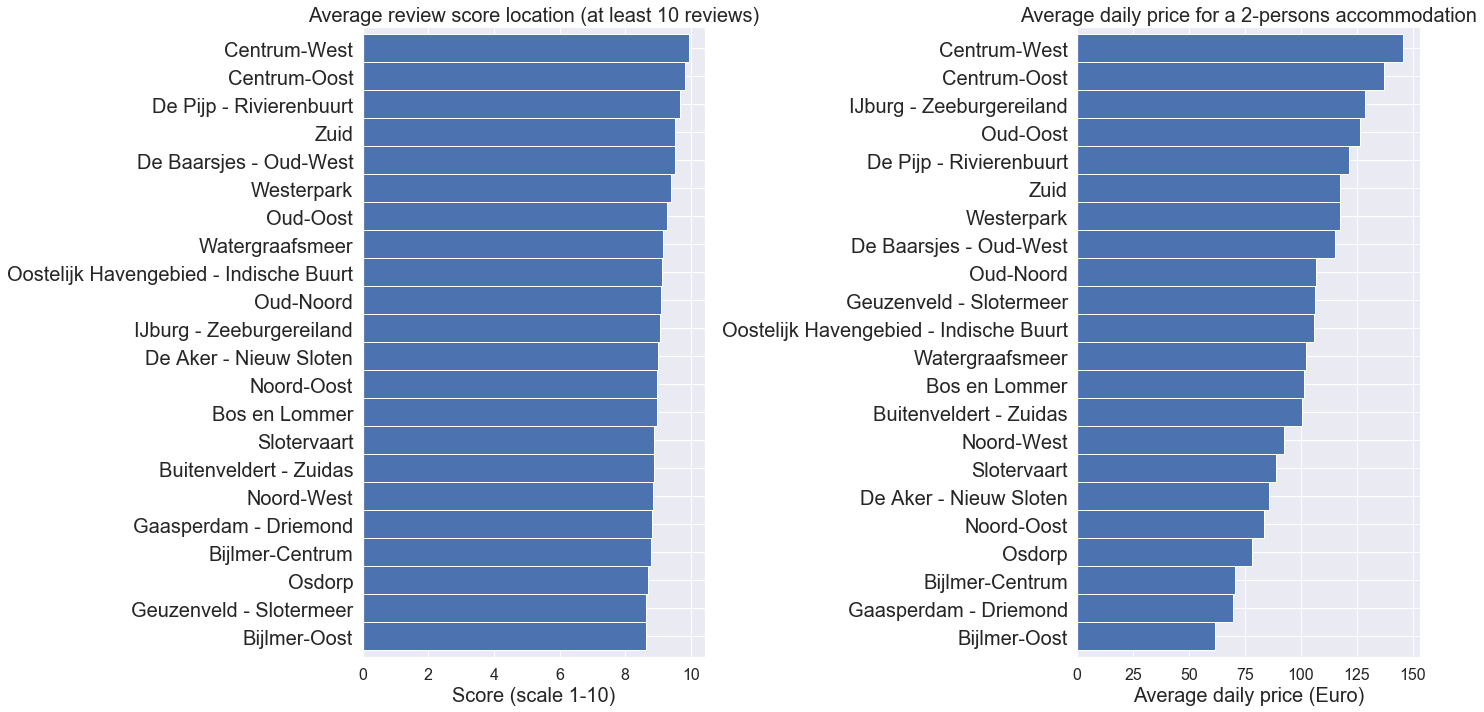

In [25]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = listings[listings['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = listings[listings['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

## 4.4 How to use review scores
In addition to written reviews, guests can submit an overall star rating and a set of category star ratings. Guests can give ratings on:

* Overall Experience. What was your overall experience?
* Cleanliness. Did you feel that your space was clean and tidy?
* Accuracy. How accurately did your listing page represent your space?
* Value. Did you feel your listing provided good value for the price?
* Communication. How well did you communicate with your host before and during their stay?
* Arrival. How smoothly did their check-in go?
* Location. How did you feel about the neighborhood?

Below you can see the scores distribution of all those categories. What caught my eye immediately is that scores seem really high across the board! A quick internet search told me that this seems common across Airbnb. It is explained well in this article: [Higher than the average rating? 95% of Airbnb listings rated 4.5 to 5 stars](https://mashable.com/2015/02/25/airbnb-reviews-above-average/?europe=true#1YLfzOC34sqd).

After having seen the scores distributions, I would personally consider any score of 8 or lower to be not a good score. If I wanted to use any of these scores in a search for accomodation, I believe the "Value" seems most useful. First of all, I always like to get good value for money ;-). However, the number of "10 averages" is reasonably small, which makes the indicator a bit more "distinguishable" than other indicators.

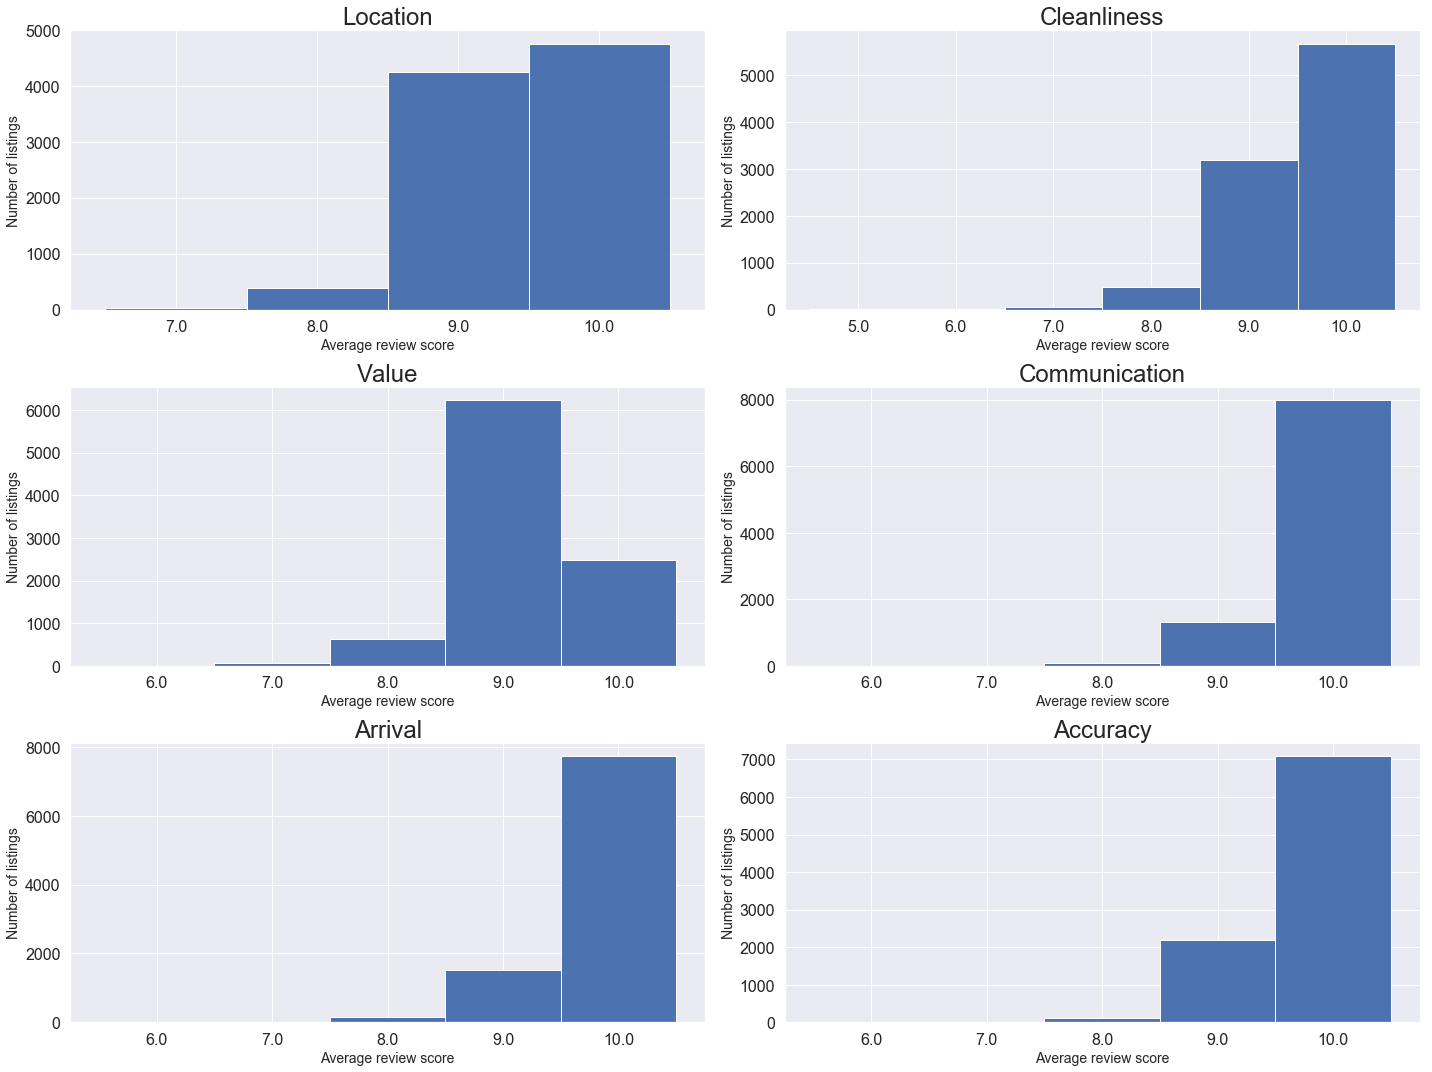

In [26]:
listings10 = listings[listings['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

## 4.5 Finding a good host
At Airbnb you can get the status "Superhost". From Airbnb:
* As a Superhost, you’ll have more visibility, earning potential, and exclusive rewards. It's our way of saying thank you for your outstanding hospitality.
* How to become a Superhost: Every 3 months, we check if you meet the following criteria. If you do, you'll earn or keep your Superhost status.
    * Superhosts have a 4.8 or higher average overall rating based on reviews from at least 50% of their Airbnb guests in the past year. 
    * Superhosts have hosted at least 10 stays in the past year or, if they host longer-term reservations, 100 nights over at least 3 stays. 
    * Superhosts have no cancellations in the past year, unless there were extenuating circumstances.
    * Superhosts respond to 90% of new messages within 24 hours.

Below, we can see that only a small portion of the listings in Amsterdam do have a host who is Superhost.

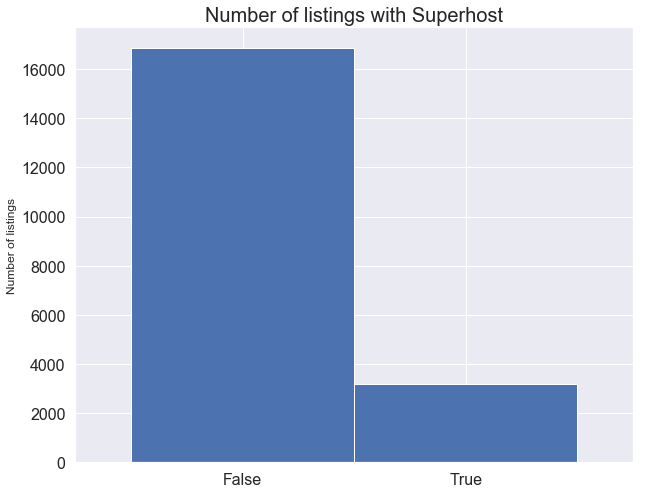

In [27]:
listings.host_is_superhost = listings.host_is_superhost.replace({"t": "True", "f": "False"})

feq=listings['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

If I were to book accomomodation, I would not necessarily look for a superhost. Actually, I would be afraid that I would pay too much as superhost will likely increase their prices. However, I would also not want to host that responds badly, or cancels a lot.

As we can see, over 5,000 of the 20,000 listings have at least 10 reviews and respond to at least 90% of the new messages. I would consider those hosts "proven" good responders (which does not mean that a listing with less than 10 reviews cannot have good responding hosts; it is just not proven yet). Also, there are very few listings with hosts not replying to new messages within 24 hours.

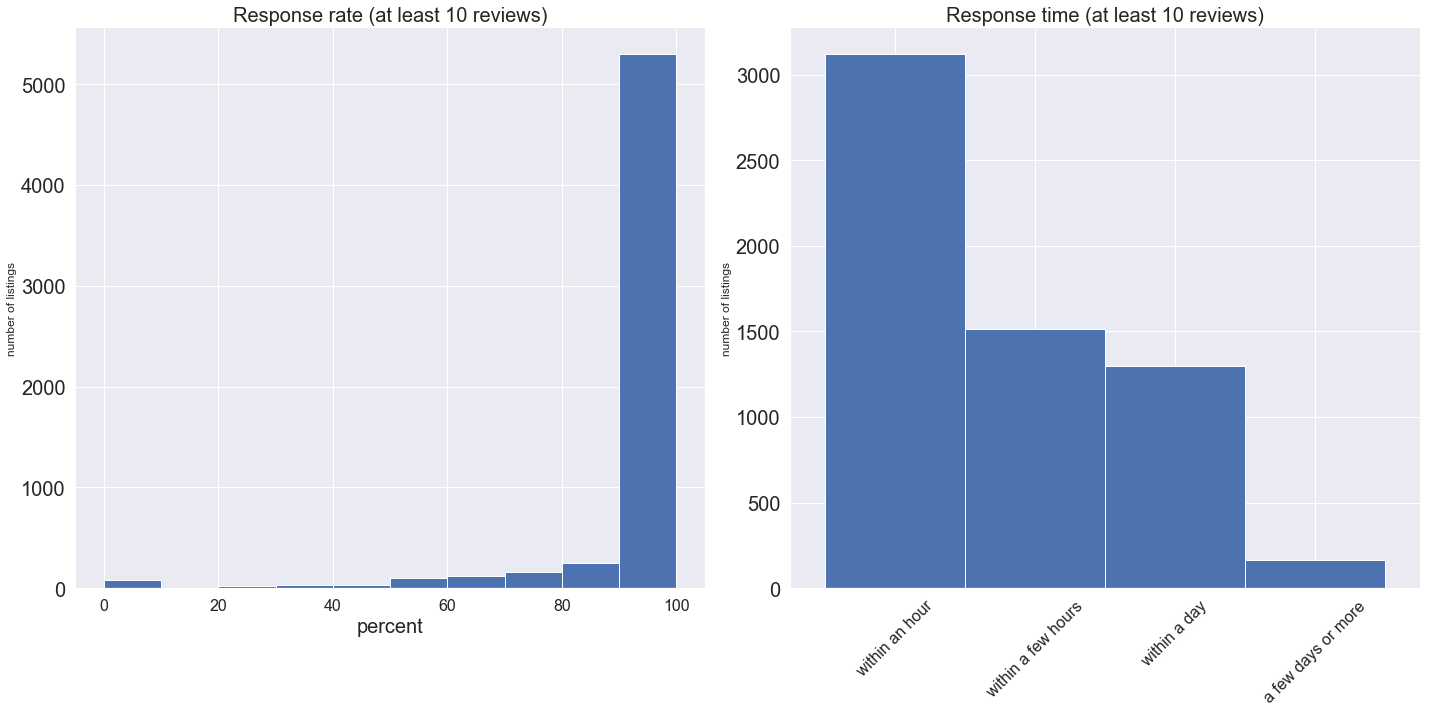

In [28]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq1 = listings10['host_response_rate'].dropna()
ax1= plt.hist(feq1)
plt.title("Response rate (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")
plt.xlabel("percent", fontsize=20)

ax2 = fig.add_subplot(122)
feq2 = listings10['host_response_time'].value_counts()
ax2=feq2.plot.bar(color='b', width=1, rot=45)
plt.title("Response time (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")

plt.tight_layout()
plt.show()

## 4.6 Availability over time
The calendar file holds 365 records for each listing, which means that for each listing the price and availablity by date is specified 365 days ahead.

In [29]:
calendar.price = calendar.price.str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))
calendar = calendar[calendar.date < '2019-12-05']

In [30]:
print(calendar.shape)

(7290073, 3)


A sample of the calendar data is shown below. Important to note: availability is FALSE means that either the owner does not want to rent out his property on the specific date, or the listing has been booked for that date already. As I want to compare apples-to-apples again regarding the prices in the next section, I am merging the 'accomodates' variable with the calendar.

In [31]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")
calendar.sample(15)

,date,available,price,accommodates
listing_id,,,,
26125229,2019-11-16,f,NaN,2
55868,2019-09-07,t,149.0,4
5628141,2019-11-05,f,NaN,4
17519167,2019-04-30,f,NaN,2
780471,2019-02-11,f,NaN,2
7511434,2019-11-06,t,140.0,5
141708,2019-09-10,f,NaN,3
2295460,2019-05-27,t,225.0,3
30203105,2019-07-30,f,NaN,3


Below, we see that up to three months ahead, there are generally more accomodations available than further into the future. Reasons for this might be that hosts are more actively updating their calendars in this timeframe. This graph is **interactive**, and hovering over the points will show you a tooltip with the "number of available listings" and "weekday" by date.

In [32]:
sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_available['weekday'] = sum_available['date'].dt.day_name()
sum_available = sum_available.set_index('date')

sum_available.iplot(y='available', mode = 'lines', xTitle = 'Date', yTitle = 'number of listings available',\
                   text='weekday', title = 'Number of listings available by date')

## 4.7 Average price by date
Below, you see the average price of all 2-persons accomodations flagged as available by date. The peak of average price 240 Euro is at December 31st, and the cyclical pattern is due to higher prices in weekends. However, I suspect that prices for dates further ahead in time are mostly not updated yet and are probably default prices. This might result in a booking not being accepted by the host if the host realizes that someone is trying to book something on a date that should have been more expensive than usual. This graph is **interactive**, and hovering over the points will show you a tooltip with the average price and weekday by date.

In [33]:
average_price = calendar[(calendar.available == "t") & (calendar.accommodates == 2)].groupby(['date']).mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')

average_price.iplot(y='price', mode='lines', xTitle='Date', yTitle='Price',
    text='weekday', title='Average price of available 2 persons accommodation by date')

## 5. Text mining the Review comments


I don't think that the outcomes of text mining the review comments will be usefull as specific advice to tourists. Therefore, I created a separate section for this. Why am I still analyzing the comments? Just because I can, and want to learn text mining with Python anyway ;-).

The "reviews" file turned out to be not very interesting, as it only holds review dates for each listing, which means that it is only good for counting numbers of reviews. The "reviews_details" file holds the same information (and the same number of records), with 4 additional columns. In addition, I merged the listing's host_id and host_names with the reviews_details file.

In [34]:
reviews_details.shape

(431830, 6)

In [35]:
reviews_details = pd.merge(reviews_details, listings[['host_id', 'host_name', 'name']], on = "listing_id", how = "left")
reviews_details = reviews_details.set_index('id')
reviews_details = reviews_details[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
reviews_details.head()

,listing_id,name,host_id,host_name,date,reviewer_id,reviewer_name,comments
id,,,,,,,,
1191,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1771,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
1989,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
2797,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
3151,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


Below, you will find the 5 hosts with most reviews. It is interesting to see the names of hosts Martijn and Feliciano again, who have been discussed before ;-).

In [36]:
host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews.head()

,,number_of_reviews
host_id,host_name,
1464510,Michiel And Jane,1772
65859990,Martijn,1407
67005410,Feliciano,1350
336950,Manuel,1154
124245,Edwin,1001


In [37]:
reviews_details.comments.head()

id
1191    Daniel is really cool. The place was nice and ...
1771    Daniel is the most amazing host! His place is ...
1989    We had such a great time in Amsterdam. Daniel ...
2797    Very professional operation. Room is very clea...
3151    Daniel is highly recommended.  He provided all...
Name: comments, dtype: object

In [38]:
reviews_details.comments.values[2] #print comment with numbers and windows line break

'We had such a great time in Amsterdam. Daniel is an excellent host! Very friendly and everytime helpful. The room was cozy, comfortable, and VERY clean. Maps, towels, mini-fridge, coffee (very tasty) and tea supplies were provided. Bathroom with all the bathroom requires. Good location - next to the tram stop and it took just around 10-15 minutes to get to the city center.\r\nTotally recommendable! '

Below I am doing some basic pre processing.

In [39]:
#take out empty comments (530)
reviews_details = reviews_details[reviews_details['comments'].notnull()]

#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '') 
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

reviews_details.comments.values[2] #print same comments again

'great time amsterdam daniel excellent host friendly everytime helpful room cozy comfortable clean maps towels mini fridge coffee very tasty tea supplies provided bathroom bathroom requires good location next tram stop took around minutes get city center totally recommendable '

In addition to removing the stopwords, I also wanted to remove the host names. However the list of host names contains over 5,000 words, and removing those takes a long time. Therefore, I am not removing them yet at this point.

In [40]:
host_names = reviews_details[['host_name']].drop_duplicates()
host_names = host_names.host_name.str.lower().tolist()

# reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split() 
#                                                       if i not in (host_names)]))

len(host_names)

5481

Below you can find my first attempt to find the most used words using the CountVectorizer() function of sklearn.

In [41]:
texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

,words,counts
51,great,203591
175,apartment,183343
53,amsterdam,171791
87,stay,164215
3,place,161435
106,us,130859
4,nice,123083
67,location,119437
26,host,102330
5,clean,94514


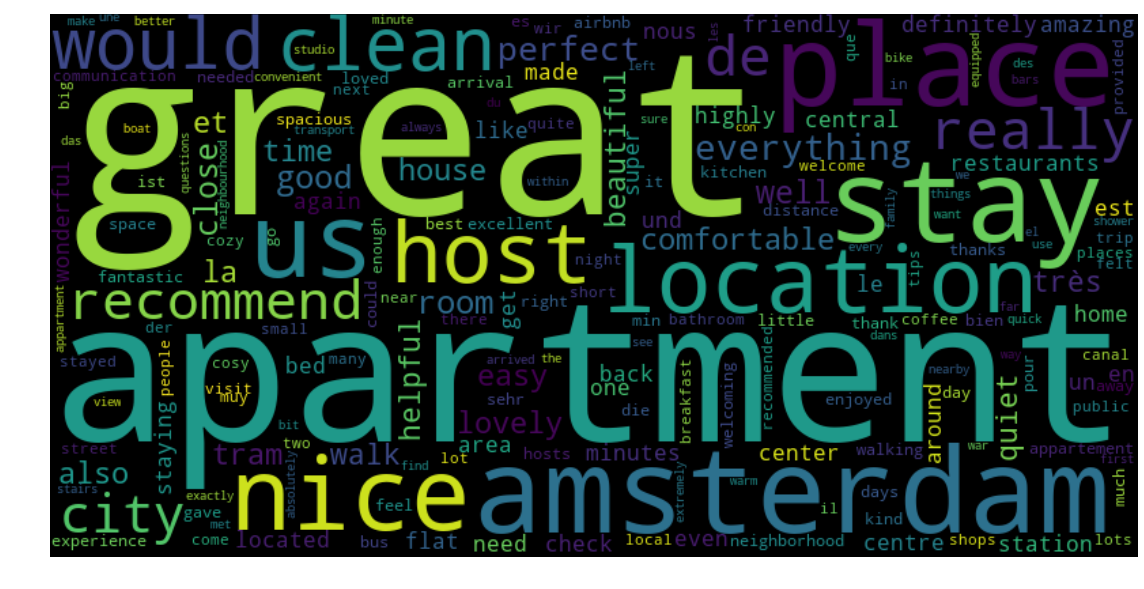

In [42]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))
wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**This is just a start of the text mining. To be continued in the next version!**

If you are interested to see what you can do with `Leaflet for R` (the R alternative of Folium), please have a look at two of my previous kernels:
* [Gun violence in the US: Interactive maps and EDA](https://www.kaggle.com/erikbruin/gun-violence-in-the-us-interactive-maps-and-eda)
* [Recommendations to PASSNYC (1st place solution)](https://www.kaggle.com/erikbruin/recommendations-to-passnyc-1st-place-solution)

If you are interested to see what you can do with `Text mining in R`, please have a look at two of my other previous kernels:
* [Text mining the Clinton and Trump election Tweets](https://www.kaggle.com/erikbruin/text-mining-the-clinton-and-trump-election-tweets)
* [Movie recommendation systems based on TMDB](https://www.kaggle.com/erikbruin/movie-recommendation-systems-based-on-tmdb)

**To be continued!**